<a href="https://colab.research.google.com/github/kamil3di/thyroid_prediction/blob/main/Thyroid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
 
from google.colab import files
files.upload()

In [ ]:
#create a kaggle folder
!mkdir ~/.kaggle
 
!cp kaggle.json ~/.kaggle/
 
!chmod 600 ~/.kaggle/kaggle.json
 
!kaggle datasets download -d kamildinleyici/thyroid-dataset
 
!unzip /content/thyroid-dataset.zip

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import tensorflow as tf
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.models import Model

In [ ]:
base_model = InceptionResNetV2(weights='imagenet',include_top = False,  input_shape=(224,224,3))
 
#base_model.trainable = False
 
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(2,activation='softmax')(x)
 
for layer in base_model.layers:
    layer.trainable = True
 
#fine_tune_at = 12
 
#for layer in base_model.layers[:fine_tune_at]:
#    layer.trainable = False
 
model = Model(inputs = base_model.input, outputs = x)

219070464/219055592 [==============================] - 2s 0us/step


In [ ]:
model.summary()

In [ ]:
lr = 0.001
opt = keras.optimizers.Adam(learning_rate=lr)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 32
TARGET_SIZE = (224,224)
TRAIN_DATA_DIR = '/content/thyroid/train'
TEST_DATA_DIR = '/content/thyroid/test'
 
train_datagen = image.ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split = 0.2,
    horizontal_flip=True) # set validation split
 
val_datagen = image.ImageDataGenerator(rescale = 1./255, 
                                       validation_split = 0.2)
                                         
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    seed = 42,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset = 'training',
    shuffle = True) # set as training data
 
validation_generator = val_datagen.flow_from_directory(
    TRAIN_DATA_DIR, # same directory as training data 
    seed = 42,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset = 'validation',
    shuffle = True)  #set as validation data

Found 32 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [ ]:
initial_epochs = 50

history = model.fit(
    train_generator,
    #steps_per_epoch = train_generator.samples // BATCH_SIZE,
    epochs = initial_epochs,
    #validation_steps = validation_generator.samples // BATCH_SIZE,
    validation_data = validation_generator)

Epoch 1/50
1/1 [==============================] - 112s 112s/step - loss: 1.5667 - accuracy: 0.3750 - val_loss: 0.5921 - val_accuracy: 0.8571
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 0.9284 - accuracy: 0.6250 - val_loss: 0.7309 - val_accuracy: 0.8571
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.8174 - accuracy: 0.7812 - val_loss: 0.8065 - val_accuracy: 0.5714
Epoch 4/50
1/1 [==============================] - 1s 991ms/step - loss: 0.4273 - accuracy: 0.8438 - val_loss: 0.6911 - val_accuracy: 0.8571
Epoch 5/50
1/1 [==============================] - 1s 975ms/step - loss: 0.4093 - accuracy: 0.7812 - val_loss: 0.3585 - val_accuracy: 0.8571
Epoch 6/50
1/1 [==============================] - 1s 978ms/step - loss: 0.2654 - accuracy: 0.9062 - val_loss: 0.3907 - val_accuracy: 0.7143
Epoch 7/50
1/1 [==============================] - 1s 985ms/step - loss: 0.1227 - accuracy: 0.9688 - val_loss: 0.4894 - val_accuracy: 0.7143
Epoch 8/50
1/1 [=========

In [ ]:
test_datagen = image.ImageDataGenerator(rescale = 1./255)
 
test_generator = test_datagen.flow_from_directory(
     '/content/thyroid/test',
     target_size = (224,224),
     batch_size =32,
     class_mode ='categorical',
     shuffle = False)

Found 10 images belonging to 2 classes.


In [ ]:
loss, accuracy = model.evaluate(test_generator)
print('Test accuracy :', accuracy)

1/1 [==============================] - 1s 915ms/step - loss: 1.5091 - accuracy: 0.7000
Test accuracy : 0.699999988079071


In [ ]:
test_image = test_generator
result = model.predict(test_image)

if np.argmax(result[0]) == 1:
  print("YES")

YES


**100 Epochs lr=0.001 test_accuracy = 0.40**
**2000 Epochs lr=0.001 test_accuracy = 0.80**


In [ ]:
Y_pred = model.predict(test_generator)

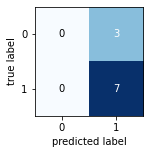

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
from mlxtend.plotting import plot_confusion_matrix
import matplotlib
 
y_pred = np.argmax(Y_pred, axis=1)
 
cm = confusion_matrix(test_generator.classes, y_pred)
 
fig,ax = plot_confusion_matrix(conf_mat= cm, figsize=(2,2),show_normed = False)
plt.show()

In [ ]:
def sayi(ornek):
  if ornek == 0:
    ornek = "bening"
  else:
    ornek = "maling"
  return ornek

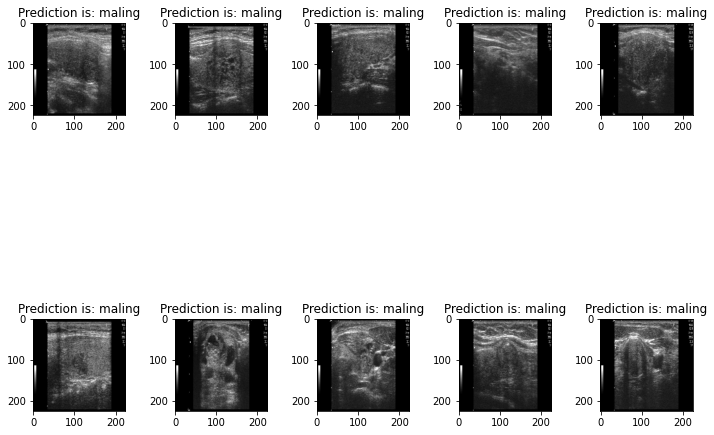

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 5, figsize=(10,10))
    axes = axes.flatten()
    i = 0
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.set_title("Prediction is: " + sayi(y_pred[i]))
        i += 1
    plt.tight_layout()
    plt.show()

augmented_images = [test_generator[0][0][i] for i in range(10)]
plotImages(augmented_images)

In [ ]:
test_generator.class_indices

{'bening': 0, 'maling': 1}

In [ ]:
model.save("thyroid_model_v1.h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
